<a href="https://colab.research.google.com/github/ykato27/Clustering_K-means/blob/main/Clustering_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 必要なライブラリーのインストール
import numpy as np
import pandas as pd

# 可視化
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set_style('whitegrid')

# 正規化のためのクラス
from sklearn.preprocessing import StandardScaler

# k-means法に必要なものをインポート
from sklearn.cluster import KMeans

In [ ]:
# irisデータ
from sklearn.datasets import load_iris

# データ読み込み
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
# データフレームに格納
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target # アヤメの種類（正解ラベル）
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'petal_width')

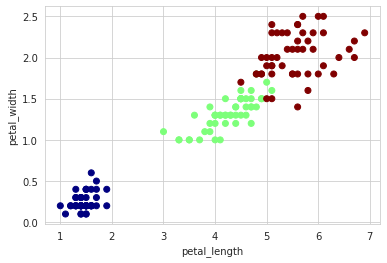

In [ ]:
# 2変数の散布図（正解ラベルで色分け）
plt.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=df_iris.target, cmap=mpl.cm.jet)
plt.xlabel('petal_length')
plt.ylabel('petal_width')

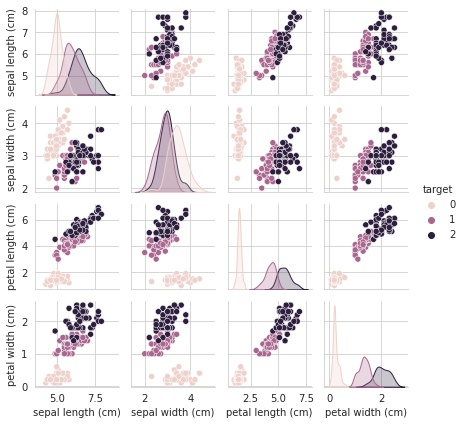

In [ ]:
# 散布図行列（正解ラベルで色分け）
sns.pairplot(df_iris, hue='target', height=1.5)

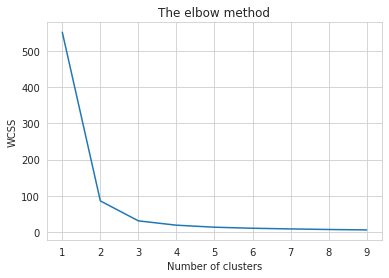

In [ ]:
# Elbow Method
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 30, random_state = 0)
    kmeans.fit(df_iris.iloc[:, 2:4])
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
# モデリング
clf = KMeans(n_clusters=3, random_state=1)
clf.fit(df_iris.iloc[:, 2:4])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [ ]:
# 学習データのクラスタ番号
clf.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
# 未知データに対してクラスタ番号を付与
# 今回は学習データに対して予測しているので、`clf.labels_` と同じ結果
y_pred = clf.predict(df_iris.iloc[:, 2:4])
y_pred 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Text(0.5, 1.0, 'Predict')

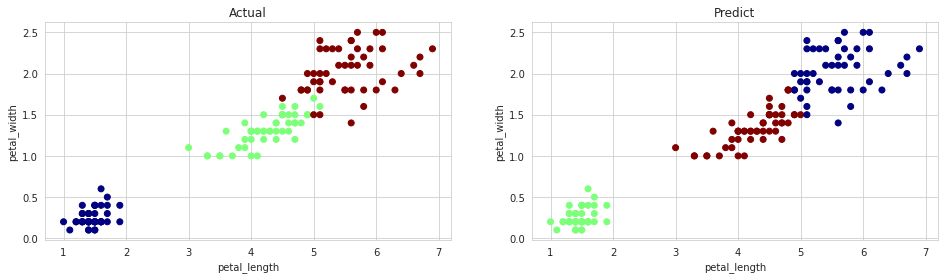

In [ ]:
# 実際の種類とクラスタリングの結果を比較
fig, (ax1, ax2) = plt.subplots(figsize=(16, 4), ncols=2)

# 実際の種類の分布
ax1.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=df_iris.target, cmap=mpl.cm.jet)
ax1.set_xlabel('petal_length')
ax1.set_ylabel('petal_width')
ax1.set_title('Actual')
# クラスター分析で分類されたクラスタの分布
ax2.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=y_pred, cmap=mpl.cm.jet)
ax2.set_xlabel('petal_length')
ax2.set_ylabel('petal_width')
ax2.set_title('Predict')